In [49]:
from data_synthesizer.synthesizer import generate

In [52]:
import matplotlib.pyplot as plt

In [50]:
im, df = generate(10)

In [51]:
df

,id,annotations
0,0,"91,13,141,50,18 71,79,150,119,20 88,191,150,22..."
1,1,"81,34,150,64,16 48,106,147,128,16 79,132,129,1..."
2,2,"59,38,111,72,3 59,72,111,106,5 59,106,111,140,..."
3,3,"56,16,114,54,8 56,54,114,92,3 56,92,114,130,5 ..."
4,4,"56,16,114,54,3 56,54,114,92,8 56,92,114,130,9 ..."
5,5,"56,16,114,54,0 56,54,114,92,6 56,92,114,130,7 ..."
6,6,"61,54,109,85,8 61,85,109,116,8 61,116,109,147,..."
7,7,"25,14,109,72,14 62,84,150,137,21 35,197,103,22..."
8,8,"59,38,111,72,6 59,72,111,106,2 59,106,111,140,..."
9,9,"62,65,107,94,5 62,94,107,123,2 62,123,107,152,..."


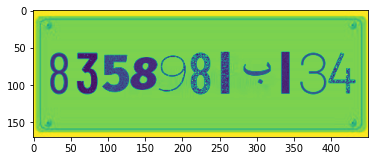

In [54]:
plt.imshow(im[3])

In [7]:
import cv2

In [45]:
im = cv2.imread('data/backgrounds/22298167-horizontal-lumière.png')

In [44]:
cv2.resize(im,(400,400))

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [16]:
import os

In [17]:
os.path.join('haha/gg', 'jj')

'haha/gg\\jj'